In [1]:
from allen_data_driven import opt_setup, opt_setup_two, opt_exec, opt_to_model
from neuronunit.optimisation.optimization_management import check_bin_vm15
from neuronunit.optimisation.model_parameters import MODEL_PARAMS, BPO_PARAMS, to_bpo_param
from neuronunit.optimisation.optimization_management import dtc_to_rheo,inject_and_plot_model
from allen_data_driven import opt_to_model
from utils import dask_map_function
import matplotlib.pyplot as plt
import numpy as np
from neuronunit.optimisation.data_transport_container import DataTC
import efel
from jithub.models import model_classes

import quantities as qt


ids = [ 324257146,
        325479788,
        476053392,
        623893177,
        623960880,
        482493761,
        471819401
       ]

specimen_id = ids[2]
efel.__file__
efel_list = list(efel.getFeatureNames());
cellmodel = "ADEXP"

test


# TODO make a nested Genetic Algorithm where the outer loop explores different preferred currents.

This will get rid of the oscillations.

In [2]:

#cellmodel = "ADEXP";
if cellmodel == "IZHI":
    model = model_classes.IzhiModel()
if cellmodel == "MAT":
    model = model_classes.MATModel()
if cellmodel == "ADEXP":
    model = model_classes.ADEXPModel()



specimen id 623960880 \\
{\small  
\url{http://celltypes.brain-map.org/mouse/experiment/electrophysiology/623960880}
specimen id 623893177 \\
\url{http://celltypes.brain-map.org/mouse/experiment/electrophysiology/623893177}
specimen id 482493761 \\
\url{http://celltypes.brain-map.org/mouse/experiment/electrophysiology/482493761}
specimen id 471819401 \\
\url{http://celltypes.brain-map.org/mouse/experiment/electrophysiology/471819401}


In [3]:
specific_filter_list = ['ISI_log_slope_1.5x',
                        'mean_frequency_1.5x',
                        'adaptation_index2_1.5x',
                        'first_isi_1.5x',
                        'ISI_CV_1.5x',
                        'median_isi_1.5x',
                        'AHP_depth_abs_1.5x',
                        'sag_ratio2_1.5x',
                        'ohmic_input_resistance_1.5x',
                        'sag_ratio2_1.5x',
                        'peak_voltage_1.5x',
                        'voltage_base_1.5x',
                        'Spikecount_1.5x',
                        'all_ISI_values',
                        'ISI_values',
                        'time_to_first_spike',
                        'time_to_last_spike',
                        'time_to_second_spike',
                        'voltage',
                        'spike_times']
simple_yes_list = specific_filter_list
target_num_spikes = 8


In [4]:
dtc = DataTC()
dtc.backend = cellmodel
dtc._backend = model._backend

dtc.attrs = model.attrs
dtc.params = {k:np.mean(v) for k,v in MODEL_PARAMS[cellmodel].items()}
dtc.attrs

{'cm': 0.281,
 'v_spike': -40.0,
 'v_reset': -70.6,
 'v_rest': -70.6,
 'tau_m': 9.3667,
 'a': 4.0,
 'b': 0.0805,
 'delta_T': 2.0,
 'tau_w': 144.0,
 'v_thresh': -50.4,
 'spike_delta': 30}

In [5]:
model = dtc.dtc_to_model()
model.attrs

#dir(model)
#vm = model._backend.get_membrane_potential()
#vm = model.get_membrane_potential()#

{'cm': 0.281,
 'v_spike': -40.0,
 'v_reset': -70.6,
 'v_rest': -70.6,
 'tau_m': 9.3667,
 'a': 4.0,
 'b': 0.0805,
 'delta_T': 2.0,
 'tau_w': 144.0,
 'v_thresh': -50.4,
 'spike_delta': 30}

In [6]:
model.params

{'cm': <bluepyopt.parameters.Parameter at 0x7f119d34ed10>,
 'v_spike': <bluepyopt.parameters.Parameter at 0x7f119d34ef50>,
 'v_reset': <bluepyopt.parameters.Parameter at 0x7f119d34ef10>,
 'v_rest': <bluepyopt.parameters.Parameter at 0x7f119d35d050>,
 'tau_m': <bluepyopt.parameters.Parameter at 0x7f119d35d090>,
 'a': <bluepyopt.parameters.Parameter at 0x7f119d35d0d0>,
 'b': <bluepyopt.parameters.Parameter at 0x7f119d35d110>,
 'delta_T': <bluepyopt.parameters.Parameter at 0x7f119d35d150>,
 'tau_w': <bluepyopt.parameters.Parameter at 0x7f119d35d190>,
 'v_thresh': <bluepyopt.parameters.Parameter at 0x7f119d35d1d0>,
 'spike_delta': <bluepyopt.parameters.Parameter at 0x7f119d35d210>}

In [7]:


dtc = dtc_to_rheo(dtc)
print(dtc.rheobase)
print(dtc.backend)


#dtc_to_rheo()

1.351753345443285 pA
ADEXP


[-70.2645766] mV [ True]


<Figure size 432x288 with 0 Axes>

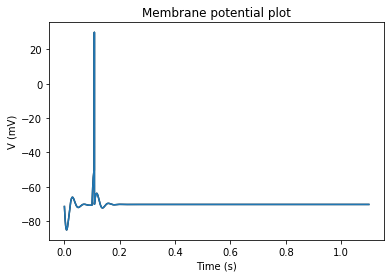

1.351753345443285 pA


In [8]:
vm,plt,dtc = inject_and_plot_model(dtc,plotly=False)
plt.show()
print(dtc.rheobase)


In [9]:
fixed_current = 122 *qt.pA
model.params

{'cm': <bluepyopt.parameters.Parameter at 0x7f119d34ed10>,
 'v_spike': <bluepyopt.parameters.Parameter at 0x7f119d34ef50>,
 'v_reset': <bluepyopt.parameters.Parameter at 0x7f119d34ef10>,
 'v_rest': <bluepyopt.parameters.Parameter at 0x7f119d35d050>,
 'tau_m': <bluepyopt.parameters.Parameter at 0x7f119d35d090>,
 'a': <bluepyopt.parameters.Parameter at 0x7f119d35d0d0>,
 'b': <bluepyopt.parameters.Parameter at 0x7f119d35d110>,
 'delta_T': <bluepyopt.parameters.Parameter at 0x7f119d35d150>,
 'tau_w': <bluepyopt.parameters.Parameter at 0x7f119d35d190>,
 'v_thresh': <bluepyopt.parameters.Parameter at 0x7f119d35d1d0>,
 'spike_delta': <bluepyopt.parameters.Parameter at 0x7f119d35d210>}

0 8
1 8
1 8
1 8
1 8
9 8
yes hit


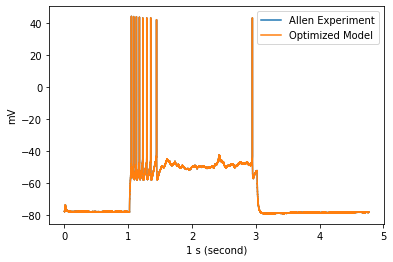

In [10]:
model.params
model.backend
model, suite, nu_tests, target_current, spk_count = opt_setup(specimen_id,
                                                              cellmodel,
                                                              target_num_spikes,provided_model=model,fixed_current=False)


In [11]:
suite.tests[-1].observation

{'mean': 2.946335, 'std': 2.946335}

In [12]:
target_current
spk_count

9.0

In [ ]:
model.seeded_current = target_current['value']
model.allen = True
model.seeded_current
model.NU = True
cell_evaluator,simple_cell = opt_setup_two(model,cellmodel, suite, nu_tests, target_current, spk_count,provided_model=model)
#mat.NU = True
NGEN = 250
MU = 20

# TODO use pebble instead.
#builtins.print = print_wrap

mapping_funct = dask_map_function
final_pop, hall_of_fame, logs, hist = opt_exec(MU,NGEN,mapping_funct,cell_evaluator)

In [ ]:
target_current

In [ ]:

opt,target = opt_to_model(hall_of_fame,cell_evaluator,suite, target_current, spk_count)

In [ ]:

#dir(cell_evaluator2)

In [ ]:
best_ind = hall_of_fame[0]
fitnesses = cell_evaluator.evaluate_with_lists(best_ind)
fitnesses;

In [ ]:
best_ind

In [ ]:
obnames = [obj.name for obj in cell_evaluator.objectives]

for i,j in zip(fitnesses,obnames):
    print(i,j)

In [ ]:
#for obj in cell_evaluator2.objectives:
#    print(obj.name)

gen_numbers = logs.select('gen')
min_fitness = logs.select('min')
max_fitness = logs.select('max')
avg_fitness = logs.select('avg')
plt.plot(gen_numbers, max_fitness, label='max fitness')
plt.plot(gen_numbers, avg_fitness, label='avg fitness')
plt.plot(gen_numbers, min_fitness, label='min fitness')

plt.plot(gen_numbers, min_fitness, label='min fitness')
plt.semilogy()
plt.xlabel('generation #')
plt.ylabel('score (# std)')
plt.legend()
plt.xlim(min(gen_numbers) - 1, max(gen_numbers) + 1)
plt.show()

In [ ]:
opt.attrs

model = opt.dtc_to_model()
plt.plot(opt.vm15.times,opt.vm15)
opt.vm15
opt.attrs


In [ ]:
#check_bin_vm15(opt,opt)

import matplotlib.pyplot as plt

plt.plot(opt.vm15.times,opt.vm15)
plt.show()


#check_bin_vm30(target,target)

opt.attrs


In [ ]:
opt.vm15.units

#opt.vm15 = opt.vm15.rescale('mV').magnitude


In [ ]:
target_current

In [ ]:
#target.vm15
target.vm15 = suite.traces['vm15']

plt.plot(target.vm15.times,target.vm15)
plt.show()


In [ ]:
target.vm15 = suite.traces['vm15']

check_bin_vm15(target,opt)
opt.attrs



In [ ]:
'''
import bluepyopt as bpop
from utils import dask_map_function
optimisation = bpop.optimisations.DEAPOptimisation(
        evaluator=cell_evaluator2,
        offspring_size = MU,
        map_function = dask_map_function,
        selector_name='IBEA',mutpb=0.1,cxpb=0.35,seeded_pop=[cp['final_pop'],cp['hall_of_fame']])#,seeded_current=target_current)
final_pop, hall_of_fame, logs, hist = optimisation.run(max_ngen=50)
'''

In [ ]:
gen_numbers = logs.select('gen')
min_fitness = logs.select('min')
max_fitness = logs.select('max')
avg_fitness = logs.select('avg')
plt.plot(gen_numbers, max_fitness, label='max fitness')
plt.plot(gen_numbers, avg_fitness, label='avg fitness')
plt.plot(gen_numbers, min_fitness, label='min fitness')

plt.plot(gen_numbers, min_fitness, label='min fitness')
#plt.semilogy()
plt.xlabel('generation #')
plt.ylabel('score (# std)')
plt.legend()
plt.xlim(min(gen_numbers) - 1, max(gen_numbers) + 1)
plt.show()


In [ ]:
for obj in cell_evaluator2.objectives:
    print(obj.name)


In [ ]:
import efel
simple_yes_list = list(efel.getFeatureNames())
simple_yes_list

'trace_check'